In [1]:
import pandas as pd

In [ ]:
!ls /kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1

custom.css  __notebook__.ipynb	__results__.html  val
images	    __output__.json	train


(640, 640, 3)


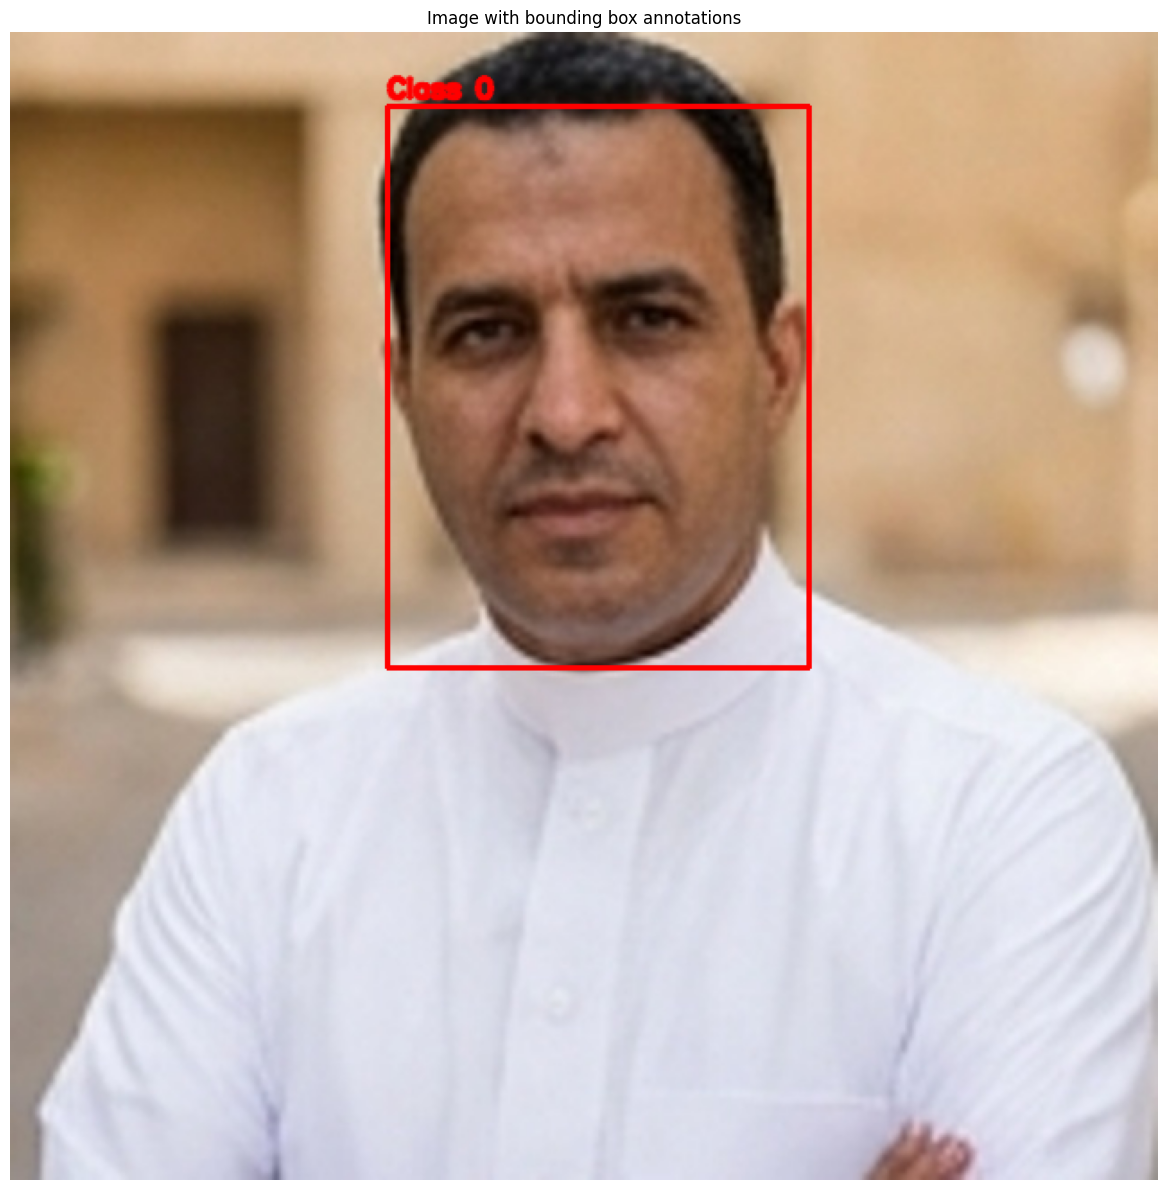

Total bounding boxes: 1
Class 0: 1 bounding boxes


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_annotations(annotation_path):
    """Loads bounding box annotations from a text file."""
    bboxes_by_class = {}

    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  
            
            class_id = int(parts[0])
            x_min, y_min, width, height = map(float, parts[1:])

            if class_id not in bboxes_by_class:
                bboxes_by_class[class_id] = []


            bboxes_by_class[class_id].append((x_min, y_min, width, height))

    return bboxes_by_class

def draw_bboxes(image, bboxes_by_class):
    """Draws bounding boxes on an image by class."""
    predefined_colors = [
        (255, 0, 0),    
        (0, 255, 0),    
        (0, 0, 255),    
        (255, 255, 0),  
        (255, 0, 255),  
        (0, 255, 255),  
        (128, 0, 0),    
        (0, 128, 0),    
        (0, 0, 128),    
        (128, 128, 0)   
    ]
    
    class_colors = {}
    image_copy = image.copy()

    for class_id, bboxes in bboxes_by_class.items():
        if class_id not in class_colors:
            class_colors[class_id] = predefined_colors[class_id % len(predefined_colors)]

        for bbox in bboxes:
            x_min, y_min, width, height = bbox


            x_min, y_min = int(x_min), int(y_min)
            x_max, y_max = int(x_min + width), int(y_min + height)


            cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), class_colors[class_id], 2)


            cv2.putText(image_copy, f"Class {class_id}", (x_min, y_min - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, class_colors[class_id], 2, cv2.LINE_AA)

    return image_copy

def visualize_image_with_bboxes(image_path, annotation_path):
    """Loads an image, overlays bounding box annotations, and displays it."""
    if not os.path.exists(image_path) or not os.path.exists(annotation_path):
        print(f"Error: Image or annotation file not found.")
        print(f"Image path: {image_path}")
        print(f"Annotation path: {annotation_path}")
        return
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    bboxes_by_class = load_annotations(annotation_path)
    image_with_bboxes = draw_bboxes(image, bboxes_by_class)
    
    plt.figure(figsize=(12, 12))
    plt.imshow(image_with_bboxes)
    plt.title(f"Image with bounding box annotations")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    

    total_bboxes = sum(len(bboxes) for bboxes in bboxes_by_class.values())
    print(f"Total bounding boxes: {total_bboxes}")
    for class_id, bboxes in bboxes_by_class.items():
        print(f"Class {class_id}: {len(bboxes)} bounding boxes")


def main():
    base_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/train/labels/"
    base_dir2 = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/"
    image_id = "2"  
    
    image_path = os.path.join(base_dir2, "images", f"{image_id}.jpg")
    annotation_path = os.path.join(base_dir, f"{image_id}.txt")
    
    visualize_image_with_bboxes(image_path, annotation_path)

if __name__ == "__main__":
    main()

In [ ]:
import os

def count_classes(label_dir):
    """Counts occurrences of class 0 and class 1 in all label files in a directory."""
    count_0 = 0
    count_1 = 0

    
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)

        
        if not os.path.isfile(file_path):
            continue

        
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_id = parts[0]  
                    if class_id == "0":
                        count_0 += 1
                    elif class_id == "1":
                        count_1 += 1

    return count_0, count_1


train_label_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/train/labels"
val_label_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/val/labels"


train_0, train_1 = count_classes(train_label_dir)
val_0, val_1 = count_classes(val_label_dir)


print("Train Dataset:")
print(f"Class 0 count: {train_0}")
print(f"Class 1 count: {train_1}")

print("\nValidation Dataset:")
print(f"Class 0 count: {val_0}")
print(f"Class 1 count: {val_1}")

Train Dataset:
Class 0 count: 350
Class 1 count: 129

Validation Dataset:
Class 0 count: 96
Class 1 count: 36


In [5]:
!mkdir ./shemagh

In [ ]:

!mkdir -p ./shemagh/train/labels
!mkdir -p ./shemagh/val/labels
!mkdir -p ./shemagh/train/images
!mkdir -p ./shemagh/val/images


!cp -r /kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/train/labels/* ./shemagh/train/labels/
!cp -r /kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/val/labels/* ./shemagh/val/labels/

In [ ]:
import os
import json
import cv2
import shutil
from tqdm import tqdm


train_labels_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/train/labels"
train_images_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/images"
val_labels_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/val/labels"
val_images_dir = "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/images"

output_train_images = "./shemagh/train/images"
output_val_images = "./shemagh/val/images"
output_train_labels = "./shemagh/train/labels"
output_val_labels = "./shemagh/val/labels"


os.makedirs(output_train_images, exist_ok=True)
os.makedirs(output_val_images, exist_ok=True)
os.makedirs(output_train_labels, exist_ok=True)
os.makedirs(output_val_labels, exist_ok=True)

def copy_files(labels_dir, images_dir, output_img_dir, output_lbl_dir):
    """Copy images and labels that have corresponding pairs."""
    label_files = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]
    for label_file in tqdm(label_files, desc=f"Copying images and labels from {labels_dir}"):
        image_name = os.path.splitext(label_file)[0] + ".jpg"
        image_path = os.path.join(images_dir, image_name)
        label_path = os.path.join(labels_dir, label_file)
        
        if os.path.exists(image_path):
            shutil.copy(image_path, os.path.join(output_img_dir, image_name))
            shutil.copy(label_path, os.path.join(output_lbl_dir, label_file))
        else:
            print(f"Warning: Image {image_name} not found for label {label_file}")


copy_files(train_labels_dir, train_images_dir, output_train_images, output_train_labels)
copy_files(val_labels_dir, val_images_dir, output_val_images, output_val_labels)

def convert_to_coco(image_dir, label_dir, output_json):
    """Convert YOLO format labels (absolute pixel values) to COCO format JSON."""
    dataset = {
        "images": [],
        "annotations": [],
        "categories":  [
    {"id": 0, "name": "head"},
    {"id": 1, "name": "shemagh"},
]
    }
    annotation_id = 1
    image_files = os.listdir(image_dir)
    
    for img_id, img_file in enumerate(tqdm(image_files, desc=f"Processing {output_json}")):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        height, width = img.shape[:2]
        
        dataset["images"].append({
            "id": img_id,
            "file_name": img_file,
            "height": height,
            "width": width
        })
        
        label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")
        if not os.path.exists(label_path) or os.stat(label_path).st_size == 0:
            continue  
        
        with open(label_path) as f:
            for line in f:
                parts = line.split()
                if len(parts) != 5:
                    continue
                class_id, x, y, w, h = map(float, parts)  
                
                dataset["annotations"].append({
                    "id": annotation_id,
                    "image_id": img_id,
                    "category_id": 1,  
                    "bbox": [x, y, w, h],  
                    "area": w * h,
                    "iscrowd": 0
                })
                annotation_id += 1

    os.makedirs(os.path.dirname(output_json), exist_ok=True)  
    with open(output_json, "w") as f:
        json.dump(dataset, f, indent=4)

    print(f"COCO dataset saved at {output_json}")



convert_to_coco(output_train_images, output_train_labels, "./shemagh/train_dataset.json")
convert_to_coco(output_val_images, output_val_labels, "./shemagh/val_dataset.json")

print("COCO dataset creation completed!")

Copying images and labels from /kaggle/input/notebooks/laytharfaoui/dal-shemagh-1-f1/train/labels: 100%|██████████| 518/518 [00:04<00:00, 113.57it/s]
Copying images and labels from /kaggle/input/notebooks/laytharfaoui/dal-shemagh-1-f1/val/labels: 100%|██████████| 133/133 [00:01<00:00, 122.29it/s]
Processing ./shemagh/train_dataset.json: 100%|██████████| 518/518 [00:01<00:00, 476.88it/s]


COCO dataset saved at ./shemagh/train_dataset.json


Processing ./shemagh/val_dataset.json: 100%|██████████| 133/133 [00:00<00:00, 470.06it/s]

COCO dataset saved at ./shemagh/val_dataset.json
COCO dataset creation completed!


In [ ]:
def plot_annotations(image_name, json_path, image_dir):
    """Plot bounding boxes on an image given its filename from the COCO JSON file."""
    with open(json_path, 'r') as f:
        dataset = json.load(f)
    
    
    image_info = next((img for img in dataset['images'] if img['file_name'] == image_name), None)
    if not image_info:
        print(f"Image {image_name} not found in dataset.")
        return
    
    img_path = os.path.join(image_dir, image_info['file_name'])
    img = cv2.imread(img_path)
    print(img.shape)
    if img is None:
        print(f"Image file {image_info['file_name']} not found at {img_path}.")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    
    
    print(image_info)
    for ann in dataset['annotations']:
        if ann['image_id'] == image_info['id']:  
            print('hi')
            print(ann['bbox'])
            x, y, w, h = ann['bbox']
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    
    plt.axis('off')
    plt.show()

In [ ]:
plot_annotations("4.jpg", "/kaggle/working/shemagh/train_dataset.json", "/kaggle/input/notebooks/kagglertw/dal-shemagh-1-f1/images")

Image 4.jpg not found in dataset.
